In [51]:
# Setting Up Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import warnings
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

### Load and View Dataset 

In [2]:
df = pd.read_csv("./Data/carclaims.csv")
df_InsClaims = df.copy()
pd.set_option('display.max_columns', 100)
df_InsClaims.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,"more than 69,000",6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,No
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36,Third Party,Sport - Collision,Sport,"more than 69,000",7,14,400,1,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,No
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,"more than 69,000",8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,"more than 69,000",9,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,No
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,42,Policy Holder,Utility - All Perils,Utility,"more than 69,000",10,7,400,1,more than 30,more than 30,2 to 4,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,No


### View Description of Dataset

In [3]:
df_InsClaims.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


### View Data Types

In [4]:
df_InsClaims.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

### Split the dataset into features and target variable

In [5]:
#Drop columns with unique values
X = df_InsClaims.drop(['PolicyNumber', 'Deductible', 'RepNumber', 'WeekOfMonth','FraudFound', 'AddressChange-Claim'], 1)
y = df_InsClaims['FraudFound']

/Users/mitcheldiaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


### Define function for finding missing values

In [6]:
def missing_value(dataframe, value):
    

    global cols
    cols = dataframe.isin([value]).any()[dataframe.isin([value]).any() == True].index.tolist()
    print(cols)
    

if __name__ == '__main__':
    value = str(input('Enter missing value: '))
    missing_value(df_InsClaims, value)

Enter missing value:  ?


[]


### Split features into numerical and categorical features

In [7]:
num = X.select_dtypes(include = np.number)
cat = X.select_dtypes(exclude = np.number)

### using KNNImputer

In [8]:
d = defaultdict(LabelEncoder) #Saving LabelEncoder as dictionary so that can be used again totransform values to original
imputer = KNNImputer()

In [9]:
#     Function to impute the missing values using KNN Imputer
#    Takes as arguments the categorical features, numerical features, columns having missing
#    values and the label encoder to use

def impute_missing(cat_df, num_df, list_of_cols, dict_of_encoder):
    '''
            
    
    '''
    
    #Apply label encoder on the columns of categorical features
    cat_df = cat_df.apply(lambda x: dict_of_encoder[x.name].fit_transform(x))
    
    #Replace the missing value encoded (?) with np.nan
    # "?" was encoded as 0 for all columns that had "?"
    for column in list_of_cols:
        cat_df[column] = cat_df[column].replace(0, np.nan)
        
    #Join the categorical and numerical features
    X = num_df.join(cat_df)
    
    #Apply KNNImputer on combined features and save it as a dataframe
    encode_data = pd.DataFrame(imputer.fit_transform(X),columns = X.columns, dtype = int)
    
    #Seperate the categorical and numerical features
    cat_df = encode_data[list(cat_df)]
    num_df = encode_data[list(num_df)]
    
    #Inverse transform the categorical features to their original values
    global new_cat
    new_cat = cat_df.apply(lambda x : dict_of_encoder [x.name].inverse_transform(x))
    print(new_cat.head())
    
#Apply impute missing function to imp
impute_missing(cat, num, cols, d)

  Month  DayOfWeek    Make AccidentArea DayOfWeekClaimed MonthClaimed     Sex  \
0   Dec  Wednesday   Honda        Urban          Tuesday          Jan  Female   
1   Jan  Wednesday   Honda        Urban           Monday          Jan    Male   
2   Oct     Friday   Honda        Urban         Thursday          Nov    Male   
3   Jun   Saturday  Toyota        Rural           Friday          Jul    Male   
4   Jan     Monday   Honda        Urban          Tuesday          Feb  Female   

  MaritalStatus          Fault         PolicyType VehicleCategory  \
0        Single  Policy Holder  Sport - Liability           Sport   
1        Single  Policy Holder  Sport - Collision           Sport   
2       Married  Policy Holder  Sport - Collision           Sport   
3       Married    Third Party  Sedan - Liability           Sport   
4        Single    Third Party  Sport - Collision           Sport   

       VehiclePrice Days:Policy-Accident Days:Policy-Claim PastNumberOfClaims  \
0  more than 69,0

### Creating Charts

In [26]:
class GraphAndCharts:
    
    
     def classification_graph(self, y_true, y_predict):
        clf_report = classification_report(y_true, y_predict, target_names = ['No', 'Yes'], output_dict=True)
        plt.figure(figsize = (8, 7))
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        plt.title('Classification Report of Model')
        plt.show()
        
     def heatmaps(self, dataframe):
        plt.figure(figsize = (10, 10))
        sns.heatmap(dataframe.corr(), annot = True, cmap = 'Reds')
        plt.title('Correlation matrix for numerical features')
        plt.show()

### Drop numerical features with correlation > 0.8

In [11]:
corr = num.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = num.columns[columns]
num = num[selected_columns]

### Prepare Data for modelling

In [12]:
#Initiate a labelencoder object
d_label = defaultdict(LabelEncoder)
new_cat = new_cat.apply(lambda x: d_label[x.name].fit_transform(x))

X_new = num.join(new_cat)
le = LabelEncoder()
y = le.fit_transform(y)

### Split data into train and test set with stratification

In [13]:
X_train, X_test, y_train, y_test = tts(X_new, y, test_size = 0.2, random_state = 42, stratify = y)

### Logistic Regression Model

In [14]:
logreg = LogisticRegression()

In [15]:
logreg.fit(X_train, y_train)

/Users/mitcheldiaz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
prediction = logreg.predict(X_test)

In [17]:
accuracy_score(y_test, prediction)

0.9400129701686122

### Initiating RandomForestClassifier


In [40]:
rfc_model = BalancedRandomForestClassifier(n_estimators= 100,random_state=1)


rfc_model = rfc_model.fit(X_train, y_train)

predictions = rfc_model.predict(X_test)

### Training the data so it fits the model


In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [42]:
# Calculated the balanced accuracy score
print(f"The balanced accuracy score is: {accuracy_score(y_test, predictions):.3f}")

The balance accuracy score is: 0.632


### Confusion Matrix 

In [47]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[1776, 1123],
       [  13,  172]])

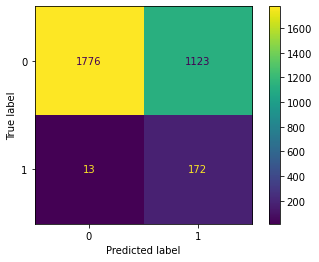

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rfc_model.classes_)
disp.plot()

In [52]:
report = classification_report_imbalanced(y_test, predictions)
print("RandomForestClassifer")
print(report)

RandomForestClassifer
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.61      0.93      0.76      0.75      0.55      2899
          1       0.13      0.93      0.61      0.23      0.75      0.59       185

avg / total       0.94      0.63      0.91      0.73      0.75      0.55      3084



### Making a Prediction Using X_test

In [20]:
y_pred_rfc = rfc.predict(X_test)

In [21]:
gc = GraphAndCharts()

### Classification Report

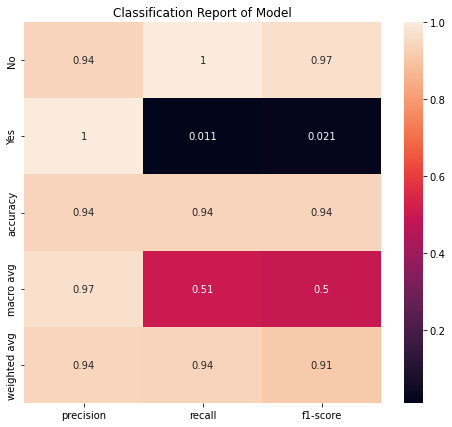

In [22]:
gc.classification_graph(y_test, y_pred_rfc)

### Correlation Matrix 

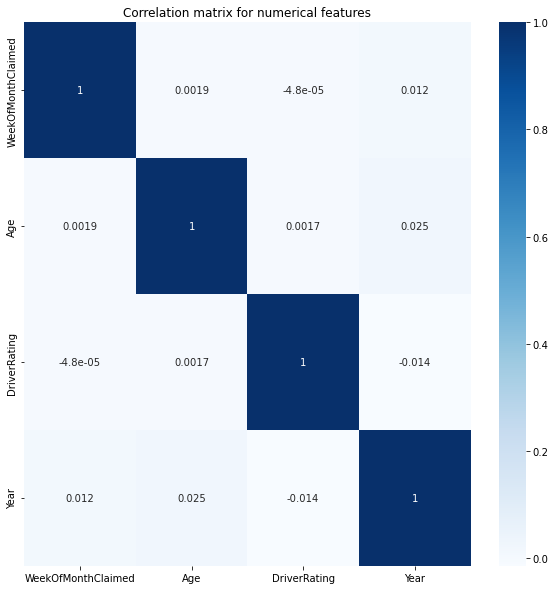

In [27]:
gc.heatmaps(num)